### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58


# 2. Vendas por Categoria


In [ ]:
import pandas as pd

# Supondo que seu DataFrame se chama 'df'
print(df.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [ ]:
import pandas as pd

quantidade_por_categoria_loja = df.groupby(['Local da compra', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')
print(quantidade_por_categoria_loja)

    Local da compra   Categoria do Produto  Quantidade Vendida
0                AC       eletrodomesticos                   1
1                AC            eletronicos                   1
2                AC        esporte e lazer                   1
3                AL             brinquedos                   1
4                AL       eletrodomesticos                   7
..              ...                    ...                 ...
194              TO        esporte e lazer                   5
195              TO  instrumentos musicais                   3
196              TO                 livros                   1
197              TO                 moveis                   7
198              TO  utilidades domesticas                   1

[199 rows x 3 columns]


# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd

# Calcula a média da coluna 'Avaliação da compra' agrupando por 'Local da compra'
media_avaliacao_por_loja = df.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()

# Renomeia a coluna para melhor interpretação
media_avaliacao_por_loja.rename(columns={'Avaliação da compra': 'Média da Avaliação'}, inplace=True)

print(media_avaliacao_por_loja)

   Local da compra  Média da Avaliação
0               AC            3.666667
1               AL            3.634146
2               AM            4.071429
3               AP            3.777778
4               BA            3.803226
5               CE            3.596026
6               DF            4.020661
7               ES            4.017544
8               GO            3.940860
9               MA            3.677419
10              MG            4.090744
11              MS            4.097561
12              MT            4.112500
13              PA            3.691358
14              PB            4.086957
15              PE            3.977901
16              PI            3.800000
17              PR            4.078224
18              RJ            3.777228
19              RN            4.208333
20              RO            3.894737
21              RR            3.000000
22              RS            4.018727
23              SC            4.011561
24              SE       

# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd

# Contar a quantidade de cada produto vendido em cada local de compra
vendas_por_produto_loja = df.groupby(['Local da compra', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Encontrar o produto mais vendido em cada local de compra
produto_mais_vendido = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Local da compra')['Quantidade Vendida'].idxmax()]
produto_mais_vendido = produto_mais_vendido.rename(columns={'Produto': 'Produto Mais Vendido', 'Quantidade Vendida': 'Quantidade Mais Vendido'})

# Encontrar o produto menos vendido em cada local de compra
produto_menos_vendido = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Local da compra')['Quantidade Vendida'].idxmin()]
produto_menos_vendido = produto_menos_vendido.rename(columns={'Produto': 'Produto Menos Vendido', 'Quantidade Vendida': 'Quantidade Menos Vendido'})

# Combinar os resultados em um único DataFrame
produtos_destaque_por_loja = pd.merge(produto_mais_vendido[['Local da compra', 'Produto Mais Vendido', 'Quantidade Mais Vendido']],
                                      produto_menos_vendido[['Local da compra', 'Produto Menos Vendido', 'Quantidade Menos Vendido']],
                                      on='Local da compra')

print(produtos_destaque_por_loja)

   Local da compra      Produto Mais Vendido  Quantidade Mais Vendido  \
0               AC                 Bicicleta                        1   
1               AL            Corda de pular                        3   
2               AM        Secadora de roupas                        2   
3               AP            Mesa de centro                        2   
4               BA                  Cama box                       13   
5               CE                  Faqueiro                        6   
6               DF     Cadeira de escritório                        9   
7               ES          Blocos de montar                        7   
8               GO                 Cama king                        8   
9               MA             Bola de vôlei                        4   
10              MG               Boneca bebê                       31   
11              MS                   Bateria                        5   
12              MT          Bola de basquete       

# 5. Frete Médio por Loja


In [ ]:
import pandas as pd

# Calcula a média da coluna 'Frete' agrupando por 'Local da compra'
frete_medio_por_loja = df.groupby('Local da compra')['Frete'].mean().reset_index()

# Renomeia a coluna para melhor interpretação
frete_medio_por_loja.rename(columns={'Frete': 'Frete Médio'}, inplace=True)

print(frete_medio_por_loja)

   Local da compra  Frete Médio
0               AC    49.361324
1               AL    33.258053
2               AM    29.368488
3               AP    21.646223
4               BA    30.257176
5               CE    25.002442
6               DF    30.185782
7               ES    33.199995
8               GO    38.129811
9               MA    35.129564
10              MG    33.460381
11              MS    33.694141
12              MT    32.691573
13              PA    30.633504
14              PB    33.910674
15              PE    35.720970
16              PI    36.948903
17              PR    34.569335
18              RJ    33.935633
19              RN    40.090987
20              RO    46.347240
21              RR   113.673032
22              RS    36.582407
23              SC    29.838897
24              SE    30.487058
25              SP    32.709219
26              TO    33.462289


In [ ]:
import pandas as pd

# Supondo que seu DataFrame original se chama 'df' e tem as colunas 'Local da compra' e 'Preço'
faturamento_por_loja = df.groupby('Local da compra')['Preço'].sum().reset_index(name='Faturamento Total')

print(faturamento_por_loja)

   Local da compra  Faturamento Total
0               AC            2804.44
1               AL           25823.67
2               AM            7848.60
3               AP            3781.44
4               BA          176053.80
5               CE           70799.98
6               DF          136502.84
7               ES          106834.71
8               GO          132492.61
9               MA           40949.76
10              MG          690814.92
11              MS           51329.96
12              MT           48582.84
13              PA           47176.43
14              PB           29506.37
15              PE          120764.28
16              PI           27864.05
17              PR          307757.16
18              RJ          771412.90
19              RN           35846.21
20              RO           16423.52
21              RR            4197.79
22              RS          367611.78
23              SC          194401.69
24              SE           16323.63
25          

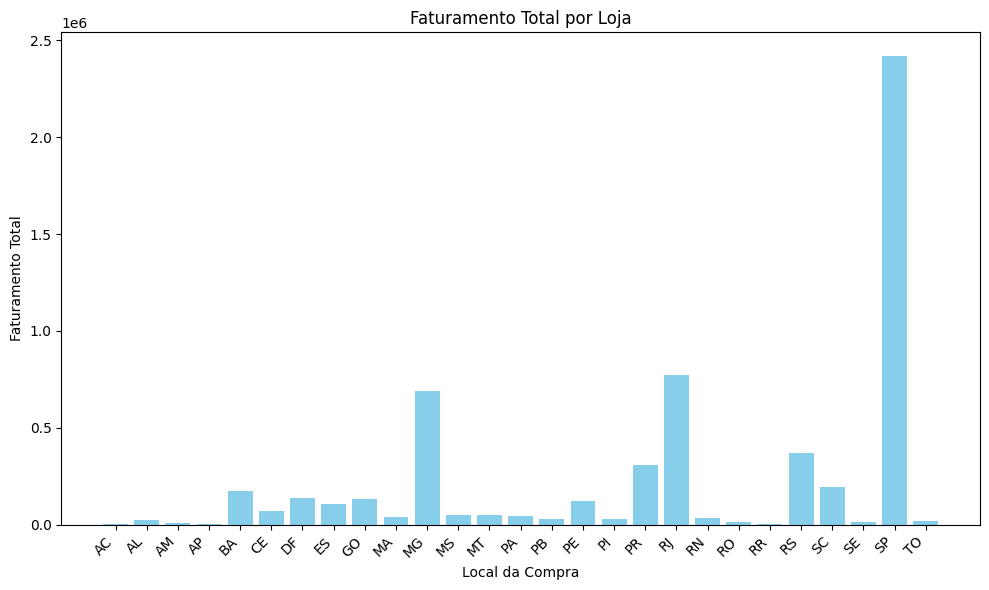

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_loja['Local da compra'], faturamento_por_loja['Faturamento Total'], color='skyblue')
plt.xlabel('Local da Compra')
plt.ylabel('Faturamento Total')
plt.title('Faturamento Total por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

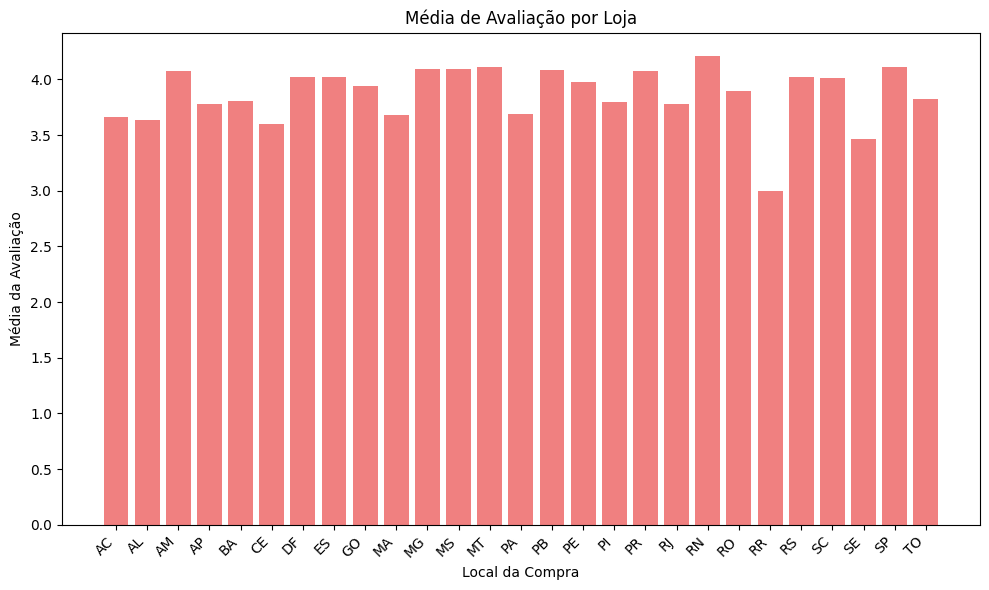

In [ ]:
import matplotlib.pyplot as plt

# Supondo que seu DataFrame de média de avaliação por loja se chama 'media_avaliacao_por_loja'
# e tem as colunas 'Local da compra' e 'Média da Avaliação'

plt.figure(figsize=(10, 6))
plt.bar(media_avaliacao_por_loja['Local da compra'], media_avaliacao_por_loja['Média da Avaliação'], color='lightcoral')
plt.xlabel('Local da Compra')
plt.ylabel('Média da Avaliação')
plt.title('Média de Avaliação por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


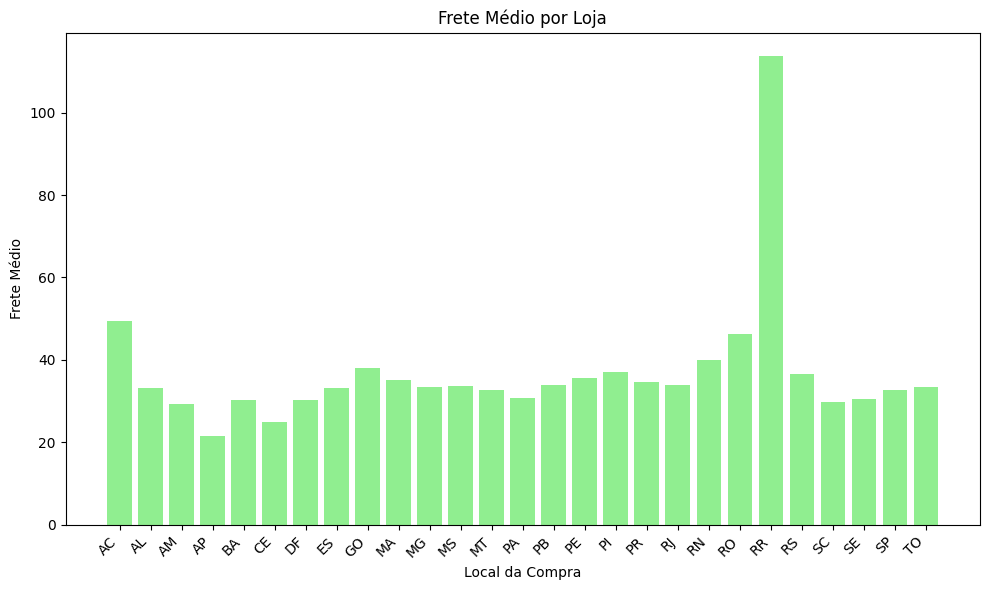

In [ ]:
import matplotlib.pyplot as plt

# Supondo que seu DataFrame de frete médio por loja se chama 'frete_medio_por_loja'
# e tem as colunas 'Local da compra' e 'Frete Médio'

plt.figure(figsize=(10, 6))
plt.bar(frete_medio_por_loja['Local da compra'], frete_medio_por_loja['Frete Médio'], color='lightgreen')
plt.xlabel('Local da Compra')
plt.ylabel('Frete Médio')
plt.title('Frete Médio por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Relatório de Análise das Lojas do Senhor João

**Introdução:**

Este relatório apresenta uma análise do desempenho de diferentes lojas do Senhor João, com o objetivo de identificar qual unidade seria mais estratégica para venda. A avaliação considerou o faturamento total, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos de maior e menor saída e o custo médio de frete. Para visualizar os resultados, foram gerados gráficos de barras comparativos para o faturamento total, a média de avaliação dos clientes e o frete médio de cada loja (identificada como 'Local da compra').

**Desenvolvimento:**

**1. Faturamento Total por Loja:**

O gráfico de faturamento total por loja revela uma variação significativa entre as unidades. A loja SP destaca-se com o maior faturamento, atingindo R$2.419.806,94. Em contraste, a loja AC apresentou o menor faturamento, com R$2.804,44, seguida de perto pela loja RR com R$4.197,79. Estes números sugerem uma grande disparidade na performance de vendas entre as diferentes localidades.

**2. Categorias de Produtos Mais e Menos Vendidas:**

Lojas com Maior Volume (Ex: SP, MG, RS, PR, RJ, DF, BA, PE, ES, GO): Nestas lojas, categorias como "eletrodomesticos", "eletronicos", "moveis", e "esporte e lazer" geralmente apresentam um volume de vendas mais expressivo. Por exemplo, em SP, "eletrodomesticos" teve 175 vendas e "eletronicos" 153.

Lojas com Menor Volume (Ex: AC, AP, RR, RO, SE, TO): Nestas localidades, muitas categorias registram poucas vendas, frequentemente apenas uma unidade. Em AC, por exemplo, "eletrodomesticos", "eletronicos", e "esporte e lazer" tiveram apenas 1 venda cada. Em RR, "brinquedos", "eletrodomesticos", "eletronicos", "esporte e lazer", e "instrumentos musicais" também tiveram uma única venda por categoria.

Categorias Consistentemente Menos Vendidas (em diversas lojas): Categorias como "livros" e "utilidades domesticas" aparecem com frequência entre as menos vendidas em várias lojas, indicando uma demanda geral menor por esses itens ou uma estratégia de vendas menos eficaz para eles.

**3. Média de Avaliação dos Clientes por Loja:**

O gráfico da média de avaliação dos clientes por loja indica que a loja RN possui a maior média de avaliação, com 4.21. Por outro lado, a loja RR apresenta a menor média de avaliação, registrando 3.00, seguida pela loja SE com 3.46. Estas médias são cruciais pois refletem diretamente a satisfação do cliente e a reputação da loja em cada localidade.

**4. Produtos Mais e Menos Vendidos:**

Analisando os produtos com maior e menor volume de vendas em cada loja, conforme a análise prévia (produtos_destaque_por_loja):

SP: O produto mais vendido foi "Carrinho controle remoto" (104 unidades), enquanto o menos vendido foi "Headset" (57 unidades).

MG: "Boneca bebê" liderou as vendas (31 unidades), e "Celular ABXY" foi o menos vendido (12 unidades).

RR: O produto "Bateria" foi tanto o mais vendido quanto o menos vendido, com apenas 1 unidade comercializada, evidenciando um volume de vendas extremamente baixo nesta loja.

AC: Similarmente a RR, "Bicicleta" foi o mais e o menos vendido, com 1 unidade.

RN: "Bicicleta" foi o mais vendido (3 unidades), e "Bateria" o menos vendido (1 unidade).

AP: "Mesa de centro" foi o mais vendido (2 unidades), e "Bicicleta" o menos vendido (1 unidade).

**5. Frete Médio por Loja:**

O gráfico do frete médio por loja demonstra que a loja RR possui o custo de frete mais elevado, com uma média de R$113,67. Em contrapartida, a loja AP apresenta o menor custo de frete médio, com R$21,65. Lojas como AC (R49,36)eRO(R46,35) também apresentam fretes médios consideravelmente altos, o que pode desencorajar compras, especialmente em produtos de menor valor.

**Recomendação:**

Com base na análise dos dados e nas visualizações geradas, a decisão sobre qual loja vender deve considerar um conjunto de fatores. No entanto, algumas considerações importantes emergem:

Lojas com baixo faturamento total consistente podem indicar um desempenho financeiro fraco e potencial para drenar recursos. As lojas AC (R2.804,44)eRR(R4.197,79) são os exemplos mais críticos.

Lojas com baixas médias de avaliação dos clientes podem sinalizar problemas de satisfação que afetam a reputação e a fidelidade. A loja RR (média 3.00) é a mais preocupante neste aspecto.

Lojas com alto frete médio, especialmente se combinado com baixo faturamento, podem impactar negativamente a lucratividade. A loja RR (frete médio R113,67)destaca−senegativamente,seguidaporAC(R49,36).

Considerando esses pontos, a loja que apresentar a pior combinação desses indicadores (baixo faturamento, baixa avaliação e/ou alto frete médio) deve ser considerada prioritariamente para venda. A loja RR consistentemente aparece com os piores indicadores: baixíssimo faturamento, a menor média de avaliação e o maior frete médio. A loja AC também apresenta um quadro preocupante com faturamento muito baixo e frete médio elevado. A alienação dessas unidades pode permitir o foco em lojas com melhor desempenho e potencial de crescimento.

Conclusão:

A recomendação final sobre qual loja vender requer uma avaliação cuidadosa de todos os dados apresentados e dos objetivos estratégicos do Senhor João. No entanto, as análises indicam que as lojas com desempenho financeiro fraco, baixa satisfação dos clientes e/ou altos custos de frete representam os maiores riscos e podem ser as candidatas mais adequadas para venda, visando otimizar os recursos e a rentabilidade geral dos negócios. Com base nos dados analisados, a loja RR é a candidata mais evidente para venda, seguida pela loja AC, devido à combinação de baixo faturamento, avaliações de clientes desfavoráveis (no caso de RR) e custos de frete elevados.